## Github 
Proper tagging of Github repository for final report as per deadlines (0.5 = 0.25 + 0.25 points)

In [23]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
import plotly

### Dataset and motivation
    
    Jessica (done)
### Actual task definition/research question
    Matt

### Literature review
    Evan
    
### Data Cleaning
    Done - Matt : GPA - convert decimal
    Matt : comfort_food - split by comma delineator, boolean flags per food type
    Matt : comfort_food_reasons - split by comma delineator, boolean flags per food type for secondary reasons (primary already documented in comfort_food_reasons_coded)
    
    Jessica (done): calculate healthiness score - low score for healthest options (new feature) 
    Jessica (done): food_childhood - split by comma delineator
    Jessica: healthy_meal - identify common terms
    
    Evan: ideal_diet - identify common terms
    Evan:weight - convert to integer
    Evan: plus one more?

### Visualization
    martix of correlation:
        healthiness score
        self_perception_weight
        weight
        GPA
        cook frequency
        life_rewarding
        martial_status


    correlation between comfort food to healthiness score. Trying correlation matrix with each dummy variable (related to common terms). mutlifactor/multivariate regresssion - on chlildhood food & comfort foods (bc similar) and then bin them as predictor variables against weights, GPA, and healhiness = would show which is correlated with what. 
    comfort food = a person continues to eat the childhood food. 

Dataset and motivation
    Jessica
Actual task definition/research question
    Matt
Literature review
    Evan
    
Data Cleaning
    Matt : GPA - convert decimal
    Matt : comfort_food - split by comma delineator, boolean flags per food type
    Matt : comfort_food_reasons - split by comma delineator, boolean flags per food type for secondary reasons (primary already documented in comfort_food_reasons_coded)
    Jessica: calculate healthiness score - low score for healthest options (new feature)
    Jessica: food_childhood - split by comma delineator
    Jessica: healthy_meal - identify common terms
    Evan: ideal_diet - identify common terms
    Evan:weight - convert to integer
    Evan: plus one more?

Visualization
    martix of correlation:
        healthiness score
        self_perception_weight
        weight
        GPA
        cook frequency
        life_rewarding
        martial_status

## Dataset and motivation slide (1 points)
How/why the dataset was collected and a description of the metadata of your dataset.

This dataset is availabe for download or through an API at https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv. It contains survey results of 60 questions from 125 Mercyhurst University students. A large number of the attributes are coded values which will require translation based on information from an associated Microsoft Word document. The data was collected to see how important nutrition is for current college students and the impact of a childhood upbringing around food.

# Actual task definition/research question (2 points)
What real-world problem are you trying to solve? What are the input and output of your
analysis?

HW 1 answer:
We are planning to analyze a survey of college students about their foods habits and general attitude about life. From this dataset, we will determine if there is a strong correlation between the dietary habits of college students and view if life is rewarding. We can determine if a person's food choices are influenced from how active they are, how often their parents cooked, and their reasons behind eating comfort food.


### FOR FINAL PROJECT (DELETE THIS HEADER BETTER FINALIZATION)

Diet has been documented as having an impact on the mental health of individuals where healthy diets can provide a positive impact on mental health. This analysis will examine if the surveyed dietary habits of college students has a correlation to grades and attitude about life being rewarding. In addition, this analysis will examine if each students family dietary habits have a correlation with the report dietary habits.

The analysis will conducted by calculating a health score based on survey results per students then plotting the scores against life attitude and family history.

## Literature review (2 points)
What other work has been done in this area, and how is your work novel compared to
others?

# Possible lit:

Journal Articles
 
 1. https://www.researchgate.net/publication/296475425_Eating_breakfast_fruit_and_vegetable_intake_and_their_relation_with_happiness_in_college_students
 1. https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-11-443

Other Articles

1. https://wellnesscenter.camden.rutgers.edu/101-health-and-wellness-tips-for-college-students/
1. https://www.consumerreports.org/mental-health/what-you-eat-can-make-you-happier/

In [24]:
df = pd.read_csv('food_coded.csv')
df.head(10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187,NaN,NaN
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155,NaN,NaN
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,NaN,NaN
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240",NaN,NaN
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190,NaN,NaN
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4,3.0,4,NaN,My current diet is terrible. I barely have tim...,2,2.0,Eating rice everyday. Eating less homemade food.,1,3,1,3.0,4,2.0,1.0,Taxi Driver,African,6,3.0,"Fries, plaintain & fried fish",1,2,2,2,4,"Requires veggies, fruits and a cooked meal.",My ideal diet is to eat 3 times a day includin...,2,1.0,5,5,4.0,2.0,Anything they'd want. I'd ask them before hand...,1.0,Hair Braider,1,1.0,2,5,5.0,5.0,1.0,2.0,4,940.0,345,None.,1,2,1315,190,NaN,NaN
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",`,2.0,1,1.0,I eat a lot of chicken 

## Quality of cleaning (6 points, 2 points each)
- Data cleaning and type conversion activity. Please share anything unusual
you faced during this activity.
- What did you do about missing values and why? Handling missing values
properly is very important.
- New feature/attribute creation and data summary statistics and
interpretation.


HW 1 answer:
This data is raw, uncleaned data from a survey of college students. There are many opportunities for data cleaning in this set, including imputing missing/none cases, standardizing open text responses, and taking out columns we won't be doing analysis on. 

Some of the columns that we expect to use in the analysis contain data type errors such as text instead of numeric. These records will need to be addressed with code to determine if a numeric substring exists and is within the distrubition of the other values.

There are multiple responses where text responses were given to numeric questions; the last question asking weight has responses like "I don't want to answer", nan, or lists unit for lbs. Likewise, throughout the data, nan, nun, and None are all used synonymously for failure to collect responses or missing entries.

# JS Cleaning

## Data Cleaning

This data is raw, uncleaned data from a survey of college students. There are many opportunities for data cleaning in this set, including imputing missing/none cases, standardizing open text responses, and taking out columns we won't be doing analysis on. 

Some of the columns that we expect to use in the analysis contain data type errors such as text instead of numeric. These records will need to be addressed with code to determine if a numeric substring exists and is within the distrubition of the other values.

There are multiple responses where text responses were given to numeric questions; the last question asking weight has responses like "I don't want to answer", nan, or lists unit for lbs. Likewise, throughout the data, nan, nun, and None are all used synonymously for failure to collect responses or missing entries.

The columns that will be cleaned are the following:

- _GPA_ 
    - definition: numerical, actual GPA
    - issue: some text values, one value that contains actual GPA and text
- _comfort_food_
    - definition: List 3-5 comfort foods that come to mind
    - issue: survey allowed for free text which resulted in a wide variety of values
- _food_childhood_
    - definition: what was your favorite childhood food?
    - issue: survey allowed for free text which resulted in a wide variety of values
- 

A new feature or column will be created that calculates a healthiness score based on the respondants answers to a subset of questions.

### GPA

The values in the GPA column are expected to be a floating point numeric value in the range 0.0 and 4.0; however, some values contain text which forces the column to be considered as object data type when loaded into a pandas data frame. The following data cleaning will extract valid GPA numerical values enter with text and convert text only values to NaN.

#### Locate non-numeric values

In [25]:
print(f'GPA type: {df["GPA"].dtypes}')
def check_decimal(x):
    try:
        float(x)
        return True
    except:
        return False
display(df.loc[~df['GPA'].apply(check_decimal) | df['GPA'].isna()])
#hist = df.hist('GPA')

GPA type: object


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61
15,NaN,2,2,430,NaN,980.0,2,"cookies, donuts, candy bars",boredom,2,4.0,2,1.0,I like a lot of foods that arent home cooked o...,2,2.0,none,3,4,4,3.0,1,1.0,5.0,Hockey Coach,italian food,1,2.0,pizza,1,3,1,1,6,"chicken, veggies, rice",I wish I ate lots of healthy foods like veggie...,2,4.0,1,5,NaN,2.0,pizza buffalo chicken pasta,4.0,Librarian,1,1.0,2,3,1.0,2.0,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180,NaN,NaN
61,Personal,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",3,2.0,3,NaN,My diet is pretty healthy and consists of chic...,1,1.0,I have gotten healthier with my eating habits....,2,5,2,2.0,4,2.0,2.0,Dead beat,Mexican,2,2.0,Chocolate,2,3,4,3,2,"chicken, veggies, fruit, water",My ideal diet would be to add more fruits and ...,2,4.0,2,4,5.0,2.0,"I would say ""lets go out""",4.0,Respiratory Therapist,4,3.0,1,2,3.0,2.0,2.0,2.0,2,725.0,500,NaN,3,1,1315,118,NaN,NaN
73,3.79 bitch,2,1,720,4.0,420.0,2,"Chips, ice cream","Boredom, stress",2,1.0,2,1.0,I have a diet of meats and other high protein ...,2,2.0,I stopped drinking soda and only drink water now,2,12,4,3.0,3,1.0,4.0,Risk Manager,Mexican,2,1.0,Pizza,1,3,2,3,1,"Protein source, vegetables, fruits, whole grains",A balanced diet with each food group. Getting ...,3,6.0,1,5,2.0,2.0,"chipotle, chick fil a, chicken and rice",2.0,Customer Service,5,3.0,1,3,1.0,3.0,1.0,1.0,2,1165.0,850,baseball,4,1,1315,200,NaN,NaN
102,NaN,1,1,610,4.0,420.0,2,"Pizza, mashed potatoes, spaghetti","Anger, sadness",3,2.0,3,1.0,"A very healthy diet. Avoiding junk foods, and ...",1,2.0,"Avoiding ""easy options"" such as junk foods",2,5,3,3.0,5,1.0,5.0,Mechanical Engineer,Italian,1,3.0,Pizza,1,5,2,2,7,"A protein, veggies, and a carb","A very healthy diet, with the occasional splur...",3,NaN,1,5,7.0,1.0,NaN,5.0,Secretary,5,1.0,2,3,1.0,4.0,1.0,2.0,2,940.0,500,NaN,5,1,900,135,NaN,NaN
104,Unknown,1,1,720,3.0,420.0,2,"Chips, chocolate, ,mozzarella sticks","Boredom, sadness, anxiety",2,4.0,2,1.0,"High in carbs, but I have recently tried to cu...",2,2.0,I've definitely gotten used to eating more oft...,1,2,2,2.0,4,NaN,4.0,Business Owner,Italian,1,3.0,"Chicken Marsala, Manicotti, Mashed Potatoes",1,4,1,3,9,"Vegetables, white meat, and a starch like pota...","A low car, low fat diet with no red meat and l...",2,5.0,3,5,3.0,1.0,"Pasta, Burgers and Fries, Chicken Marsala",3.0,Substitute Secretary,4,1.0,2,4,2.0,5.0,2.0,2.0,5,940.0,690,None at the moment,5,1,1315,230,NaN,NaN


There are five value the must be addressed. Four of the values only contain text information while one contains a mix of a valid GPA and text. The text only values will be converted to NaN. The GPA in the mixed value will be extracted with a regular expression.

GPA type: float64


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61
15,NaN,2,2,430,NaN,980.0,2,"cookies, donuts, candy bars",boredom,2,4.0,2,1.0,I like a lot of foods that arent home cooked o...,2,2.0,none,3,4,4,3.0,1,1.0,5.0,Hockey Coach,italian food,1,2.0,pizza,1,3,1,1,6,"chicken, veggies, rice",I wish I ate lots of healthy foods like veggie...,2,4.0,1,5,NaN,2.0,pizza buffalo chicken pasta,4.0,Librarian,1,1.0,2,3,1.0,2.0,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180,NaN,NaN
61,NaN,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",3,2.0,3,NaN,My diet is pretty healthy and consists of chic...,1,1.0,I have gotten healthier with my eating habits....,2,5,2,2.0,4,2.0,2.0,Dead beat,Mexican,2,2.0,Chocolate,2,3,4,3,2,"chicken, veggies, fruit, water",My ideal diet would be to add more fruits and ...,2,4.0,2,4,5.0,2.0,"I would say ""lets go out""",4.0,Respiratory Therapist,4,3.0,1,2,3.0,2.0,2.0,2.0,2,725.0,500,NaN,3,1,1315,118,NaN,NaN
102,NaN,1,1,610,4.0,420.0,2,"Pizza, mashed potatoes, spaghetti","Anger, sadness",3,2.0,3,1.0,"A very healthy diet. Avoiding junk foods, and ...",1,2.0,"Avoiding ""easy options"" such as junk foods",2,5,3,3.0,5,1.0,5.0,Mechanical Engineer,Italian,1,3.0,Pizza,1,5,2,2,7,"A protein, veggies, and a carb","A very healthy diet, with the occasional splur...",3,NaN,1,5,7.0,1.0,NaN,5.0,Secretary,5,1.0,2,3,1.0,4.0,1.0,2.0,2,940.0,500,NaN,5,1,900,135,NaN,NaN
104,NaN,1,1,720,3.0,420.0,2,"Chips, chocolate, ,mozzarella sticks","Boredom, sadness, anxiety",2,4.0,2,1.0,"High in carbs, but I have recently tried to cu...",2,2.0,I've definitely gotten used to eating more oft...,1,2,2,2.0,4,NaN,4.0,Business Owner,Italian,1,3.0,"Chicken Marsala, Manicotti, Mashed Potatoes",1,4,1,3,9,"Vegetables, white meat, and a starch like pota...","A low car, low fat diet with no red meat and l...",2,5.0,3,5,3.0,1.0,"Pasta, Burgers and Fries, Chicken Marsala",3.0,Substitute Secretary,4,1.0,2,4,2.0,5.0,2.0,2.0,5,940.0,690,None at the moment,5,1,1315,230,NaN,NaN


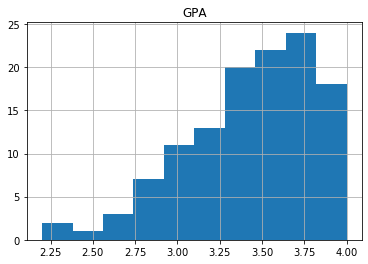

In [26]:
# Find either decimal or numeric values. The decimal must be examined first because a decimal could incorrectly be considered a numeric.
df['GPA'] = df['GPA'].str.extract("(\d+\.\d+|\d*)")
# Replace blank values with NaN
df['GPA'] = df['GPA'].replace('^\s*$',np.nan,regex=True)
df['GPA'] = pd.to_numeric(df['GPA'])
print(f'GPA type: {df["GPA"].dtypes}')
display(df.loc[~df['GPA'].apply(check_decimal) | df['GPA'].isna()])
hist = df.hist('GPA')

The GPA column was successful changed to a float64 data type, the four invalid text values were converted to NaN, and a histogram plot was generated to provide a visual reference of the distribution of GPA values.

### comfort_food, food_childhood, 

The survey did not place an controls on the text that could be entered for this column which has resulted in various terms for similar foods, multiple types of delimitors, and various other issues. The following data cleaning the column by:
- Considering separators as stopwords,
- Ignore custom stopwords,
- Merge plural and singular terms,
- Ignore capitalization.

A collection of new columns will be created that count the number of times select keywords were listed.

In [27]:
# Create a function that can process each free text column that contains a list of foods

def food_count(dfIn, column, categories, stopwords):
    # Stopwords based on review of text values

    
    # Empty set to collect clean food words
    clean_food = set()
    
    # Iterate through the column to identify the clean words
    for value in dfIn[column].str.lower():
        try:
            words = nltk.word_tokenize(value)
            #going thru each tokenized phrase
            for w in words:
                if w not in stopwords:
                    
                    #getting a clean list of foods
                    clean_food.add(w)    
        except:
            continue # Ignore NaN value
    print(f'Keywords identified: {len(clean_food)}\n{clean_food}')
    
    
    # Create new columns for each of the categories with a prefix of the source column
    for cat in categories:
        df[column + '_fc_' + cat] = 0 #stands for food_childhood_fooditem
    df[column + '_fc_other'] = 0
    df[column + '_fc_otherValues'] = ''
        
    #converting values from the column into new category columns depending on value
    #same idea as above but now tokenize each row and call into those words to determine which column (above was just one big list together)
    for index, row in df.iterrows():
        try:
            # tokenize the column text, remove stopwords, add a value to targect column if a keyword is found
            words = nltk.word_tokenize(row[column].lower())
            words = [w for w in words if w not in stopwords]
            for word in words:
                    catAssinged = False
                    for cat in categories:
                        if word in categories[cat]:
                            df.at[index, column + '_fc_' + cat] += 1
                            catAssigned = True
                            
                            # Remove the word from the clean_food set
                            try:
                                clean_food.remove(word)
                            except:
                                continue
                                
                        # Break loop if the word has been assigned to a category
                        if catAssinged: break

                    if not catAssinged:
                        df.at[index, column + '_fc_other'] += 1
                        df.at[index, column+'_fc_otherValues'] = df.at[index, column+'_fc_otherValues'] + "," + word
        #except KeyError:
        #    continue
        except AttributeError:
            # Error thrown by NaN values, ignore row
            continue 
    
    df[column+'_fc_otherValues'] = df[column+'_fc_otherValues'].str[1:]
    
    print(f'\n\nKeywords not counted: {len(clean_food)}\n{clean_food}')


__WRITE SOMETHING ABOUT HOW THIS CODE ALLOWED FOR THE DEVELOPMENT OF THE STOPWORDS__

In [28]:
#healthy_meal - identify common terms

df['healthy_meal'] = df['healthy_meal'].str.lower()
print(df['healthy_meal'])

clean_meals = []
for index, row in df.iterrows():
    try:
        meal = nltk.word_tokenize(row['healthy_meal'])
    except:
        TypeError
    #print(meal)

    stopwords = ['and', '/', 'of', 'some', 'so', '.', ';', ',', 'also', ')', '(', '&', 'a', 'you', 'have', 'the', 'i', 'such', 'as', 'to', 'me', 'or',
    'is', 'on', 'it', '!', 'with', 'food', 'meal', 'lots', 'for', 'side', 'healthy', 'groups']
    clean_each = [w for w in meal if w not in stopwords]

    clean_meals.extend(clean_each)

#print(clean_meals)

#grouping vegetables, grains, and fruits together
clean_meals= list(map(lambda x: x.replace('vegetable', 'vegetables'), clean_meals))
clean_meals= list(map(lambda x: x.replace('vegetabless', 'vegetables'), clean_meals)) #might not need
clean_meals= list(map(lambda x: x.replace('veggies', 'vegetables'), clean_meals))
clean_meals= list(map(lambda x: x.replace('grain', 'grains'), clean_meals))
clean_meals= list(map(lambda x: x.replace('grainss', 'grains'), clean_meals)) #might not need
clean_meals= list(map(lambda x: x.replace('fruit', 'fruits'), clean_meals))
clean_meals= list(map(lambda x: x.replace('fruitss', 'fruits'), clean_meals)) #might not need


#print(clean_meals)

m_count = Counter(clean_meals)
print("10 most common words from 'healthy_meal'and freq:", m_count.most_common(n=10))


0                                        looks not oily 
1      grains, veggies, (more of grains and veggies),...
2      usually includes natural ingredients; nonproce...
3               fresh fruits& vegetables, organic meats 
4      a lean protein such as grilled chicken, green ...
5           requires veggies, fruits and a cooked meal. 
6             protein, vegetables, fruit, and some carbs
7      a healthy meal has a piece of meat followed by...
8                                               colorful
9              chicken and rice with a side of veggies. 
10                                 chicken, and veggies 
11           lean protein, veggies, fruit, complex carbs
12     a salad with a reasonable amount of dressing a...
13     lots of vegetabls with some grains like rice. ...
14                                  green and not greasy
15                                chicken, veggies, rice
16     not too much carbs, a lot of protein, healthy ...
17     for me usually a big pie

In [29]:
# Enter parameters to create new columns from the target existing ones
stopwords = ['every', 'wings', 'such', 'me', "n't", 'mashed', 'a', 'feel', 'cheesy', 'day', 'out', 'cook',
            'orange', "'s", 'little', 'of', 'my', 'one', 'way', 'current', 'so', '(', 'is', 'parmigiana',
            'food', 'would', 'cheesey', 'cherry', 'homemade', 'less', 'parmesan', 'grilled', 'are', 'rolls',
            'very', '3', 'scalloped', 'lunch', 'than', '.', 'much', 'now', 'home', 'butter', 'i', 'the', 'fry',
            'eat', '&', 'fingers', 'nuggets', 'diet', 'lots', 'wellhigh', 'enough', 'good', 'breakfast', 'be',
            'dad', 'with', 'dinner', 'fried', 'lot', 'time', 'at', 'alfredo', 'meals', 'what', 'tenders', 'that',
            'in', 'cob', 'breaded', 'add', 'garlic', '/', ',', 'more', 'consume', 'eating', 'only', 'parm', 'able',
            'as', 'foods', 'for', ')', 'n', 'meal', 'no', 'back', 'on', 'same', 'get', 'cooked', 'not', 'have',
            '-', 'also', 'none', 'to', 'do', 'but', 'it', 'low', 'or', 'ideally', 'want', 'intake', 'buttered',
            'like', 'adobo', 'cut', 'any', 'tender', 'wegmans', 'how', 'and', 'legs', 'all', 'each', 'ideal', 'anything',
            'microwaveable', 'frozen', 'grandma']

categoriesDict = {'meat' : ['chicken', 'wing','protein','protien','proteins', 'tuna', 'yogurt', 'hamburger', 'beef',
                            'chicken','meat','meats','red','fish','burgers','white', 'meatball', 'hamburgers', 'burger'
                            'eggs','steak','tuna','peanut','nut','seafood','turkey', 'sushi', 'egg', 'quinoa', 'almonds',
                            'burgers'],
                  
                  'fruit' : ['fruits','fruit','veggies/fruits', 'watermelon', 'grapes', 'plantain', 'banana'],
                  
                  'veggie' : ['salad','plant','plant-based', 'veggie', 'vegetables', 'vegetable', 'broccoli', 'peppers',
                              'vegtables', 'pepper'],
                  
                  'carbs' : ['mac', 'macaroni', 'pizza', 'pizza/','pasta', 'spaghetti', 'pierogies',
                             'lasagna', 'noodles', 'tortellini', 'noodle','carbs','carbohydrates',
                             'pasta','toast','breads','sandwich','breads','wheat', 'pretzels', 'pretzals',
                             'rice', 'lasagne', 'potato', 'potatoes', 'mac-n-cheese'],
                  
                  'junk' : ['processed','sugar','sweets','fat','junk','desserts','dessert','deserts',
                            'unhealthy','snacking','snack','snacks','snack/junk','greasy,','artificial',
                            'sugars','food/desserts','candy','fried', 'brownie', 'chocolate', 'pepsi', 'candy',
                            'mcdonalds', 'donuts', 'cake', 'cookie', 'chocolates', 'jerky', 'milkshakes', 'desserts',
                            'ice-cream', 'icecream', 'cookies', 'frosted', 'cheez-its', 'fries', 'twizzlers', 'pie', 'fires',
                            'macroons'],
                  
                  'healthy_tw' : ['healthy','fresh','organic','healthier','balanced','balance','organic/healthy','health','refined','nutritious','nutrients'],
                  
                  'water' : ['water','hydration','drink']   
}

In [30]:
# Create new comfort_food columns for the target collection of foods
food_count(df, 'comfort_food', categoriesDict, stopwords)

Keywords identified: 151
{'almonds', 'pretzals', 'pretzels', 'salty', 'bars', 'dessets', 'kinds', 'chinese', 'mcdonalds', 'donuts', 'reese', 'popcorn', 'beef', 'rice', 'naan', 'masala', 'cream', 'cream/milkshake', 'ritz', 'chips', 'quinoa', 'moes', 'seaweed', 'cheeseburgers', 'mac', 'coffee', 'dip', 'steak', 'chocolate', 'omelet', 'jims', 'potatoes', 'debbie', 'terra', 'curry', 'korean', 'noodle', 'doritos', 'pancakes', 'toast', 'sponge', 'bread/crackers', 'snacks', 'wine', 'capps', 'pizza', 'chex-mix', 'macaroons', 'hot', 'cheesecake', 'dark', 'pierogies', 'burger', 'watermelon', 'candy', 'fires', 'doughnuts', 'nuggs', 'cornbread', 'dr.', 'sweets', 'ranch', 'salsa', 'banana', 'cucumber', 'burgers', 'pasta', 'moe', 'cake', 'lasagne', 'plantain', 'sub', 'brownie', 'grapes', 'protein', 'chicken', 'pop', 'cereal', 'dough', 'soup', 'peruvian', 'salt', 'squash', 'indian', 'egg', 'mozzarella', 'chipotle', 'potato', 'mix', 'cups', 'fritos', 'kit', 'bagels', 'soda', 'cheese', 'sticks', 'peanut

In [31]:
# Create new food_childhood columns for the target collection of foods
food_count(df, 'food_childhood', categoriesDict, stopwords)

Keywords identified: 105
{'stew', 'marsala', 'ugali', 'deer', 'chinese', 'beef', 'popcorn', 'stromboli', 'rice', 'cream', 'fish', 'baked', 'stroganof', 'mac', 'dip', 'steak', 'chocolate', 'dumplings', 'pockets', 'sweet', 'potatoes', 'hamloaf', 'noodles', 'curry', 'casserole', 'noodle', 'pancakes', 'toast', 'tarts', 'tiramisu', 'stir', 'biscuits', 'perogies', 'jollof', 'pizza', 'won', 'manacotti', 'tortellini', 'hot', 'panini', 'plantains', 'burger', 'dino', 'corn', 'celery', 'joes', 'dogs', 'pop-tarts', 'burgers', 'pasta', 'waffles', 'manicotti', 'crab', 'pita', 'pickles', 'quesadillas', 'chicken', 'pop', 'soup', 'chip', 'sloppy', 'tomatoes', 'ham', 'wing', 'potato', 'biryani', 'stroganoff', 'cheese', 'beans', 'peanut', 'hamburgers', 'macaroni', 'italian', 'cookies', 'fries', 'plaintain', 'sandwich', 'roast', 'pizza/', 'shrimp', 'meatballs', 'mushroom', 'cheease', 'isombe', 'vegetable', 'sausage', 'schnitzle', 'quesadilla', 'jelly', 'eggs', 'salad', 'tacos', 'lasagna', 'tons', 'turkey'

In [32]:
# Create new healthy_meal columns for the target collection of foods
food_count(df, 'healthy_meal', categoriesDict, stopwords)

Keywords identified: 208
{'yourself', 'mostly', 'grains', 'keep', 'raspberry', 'dressing', 'pyramid', 'carbonated', 'greasy', 'natural', 'includes', 'proportions', 'bbq', 'support', 'intaking', 'rice', 'grease', 'lean', 'fish', 'healthier', 'quinoa', 'kind', 'chips', 'followed', 'groups', 'fresh', 'mac', 'overly', "'d", 'steak', 'serving', 'portions', 'fruits/veges', 'high', 'dairy', 'some', 'combines', 'sweet', 'potatoes', 'section', 'main', 'by', 'instead', 'carbohydrates', 'calories', 'balanced', 'full', 'vegitibles', 'plate', 'nutrients', 'smaller', 'vitamins', 'proteins', 'fryed', 'then', 'oily', 'grain', 'usually', 'well', 'you', 'opposed', 'steam', 'fiber', 'water', 'green', 'has', 'consists', 'brown', 'colorful', 'dessert', 'zucchini', 'beverages', 'between', 'corn', 'group', 'whole', 'ounces', 'etc', 'mainly', 'other', 'fruits', 'including', 'sort', 'amount', 'pasta', 'ingredients', 'minerals', 'spread', 'prep', 'seasoned', '2-3', 'variety', 'just', 'veg', 'pita', 'there', 'br

In [33]:
# Create new healthy_meal columns for the target collection of foods
food_count(df, 'ideal_diet', categoriesDict, stopwords)

Keywords identified: 353
{'though', 'keep', 'real', 'freshly', 'bars', 'includes', 'thing', 'should', 'salads', 'college', 'consistently', 'excessive', 'will', 'things', 'daily', 'caffiene', 'portions', 'plant-based', 'dairy', 'allows', 'eventually', 'can', 'carbohydrates', 'balanced', 'consist', 'toast', 'proteins', 'smoothies', 'brought', 'snacking', 'opposed', 'gym', 'alot', 'fourth', 'consists', 'colorful', 'around', 'properly', 'mainly', 'give', 'needs', 'burgers', 'sticking', 'instant', 'going', 'chicken', 'trying', 'times', 'lived', 'days', 'larger', 'proportion', 'varienty', 'satisfied', 'sugar', 'prefer', 'nicer', 'filled', 'complete', 'along', 'source', 'go', 'healthy', 'idealy', 'fats', 'fast', 'veggies/fruits', 'veggies', '``', 'primary', 'pretty', 'budget', 'away', 'plenty', 'tasty', 'say', 'getting', 'plant', 'together', 'balance', 'products', 'island', 'love', 'from', 'eggs', 'vegetables', 'salad', 'cooking', 'where', 'blend', 'food/desserts', 'especially', 'its', 'bread

In [34]:
# Create new meals_dinner_friend columns for the target collection of foods
food_count(df, 'meals_dinner_friend', categoriesDict, stopwords)

Keywords identified: 153
{'mixed', 'stirfry', 'asada', 'ask', 'hibachi', 'if', 'kinds', 'marsala', 'chinese', 'beef', 'rice', 'was', 'their', 'cream', 'shells', 'fish', 'pudding', 'con', 'baked', 'ritz', 'kind', 'moes', 'mac', 'busy', "'d", 'ziti', 'steak', 'king', 'chocolate', 'related', '3.', 'friend', 'some', 'potatoes', 'coming', 'lobster', 'noodles', 'curry', 'sea', 'something', 'poutine', 'pancakes', 'toast', 'veal', 'wine', 'hamburger', 'potatos', 'pizza', 'take', 'croque', 'dessert', 'kimchi', 'corn', 'al', 'they', 'steamed', 'lemon', 'vietnamese', 'which', 'pho', 'crockpot', 'hand', 'burgers', 'pasta', 'spagetti', 'seasoned', 'madam', 'manicotti', 'crab', 'marinated', 'carbonara', 'chicken', 'type', 'cereal', 'them', 'cuisine', 'chick', 'buffalo', 'soup', 'easy', 'chili', 'squash', 'meringue', "''", 'pulled', 'chipotle', 'potato', 'meat', 'jerk', '1.', 'stroganoff', 'dish', 'cheese', 'w/', 'hamburgers', 'lets', 'italian', 'fries', 'go', 'lentil', 'chops', 'roast', 'choice', 's

### weight and life_rewarding

In [35]:
#Removing str from cells
df['weight']=df['weight'].astype(str)
df['weight'] = df['weight'].str.extract('(\d+)', expand=False)
#Removing NaN values
df["weight"] = pd.to_numeric(df["weight"], errors="ignore")
df = df[df['weight'].notna()]



#Life Rewarding column was far less cumbersome and I just needed to drop NaN values
df["life_rewarding"] = pd.to_numeric(df["life_rewarding"], errors="ignore")
df = df[df['life_rewarding'].notna()]


### Heathiness_Score (new feature)

Five questions of the survey asked the respondants to select one of two options that they associate with a food related term. A heathiness score will be calculated based on how the select of five questions. A zero will be assigned if the respondant selected the healthy option and a one if the unhealthy option was selected. The healthiness score will be calculated as the sum of the five assigned values. The range of the scores will be from 0 to 5 where lower scores will be considered the healthiest. 

The specific surveys questions are:

- _Breakfast_ 
    - definition: (the participants are shown the following pictures and asked which one of these pictures they associate with the word "breakfast")
        - 1 - cereal option (healthy option)
           
            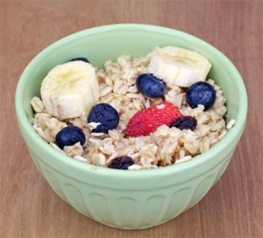
        - 2 - donut option 
         
            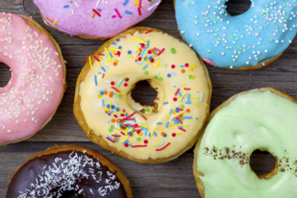|
- _coffee_
    - definition: which of the two pictures you associate with the word coffee?
        - 1 - creamy frapuccino 

            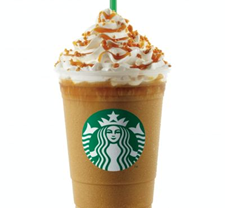
        - 2 - espresso shown (healthy option)
                 
            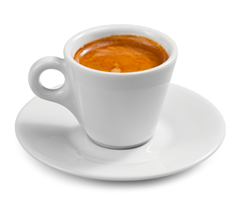
    

__NEED TO FINISH WRITING THIS SECTION__

In [36]:
#calculate healthiness score - low score for healthest options (new feature)

#breakfast = 1 (Cereal), 2 (donuts). 1 = healthy (H), 2 = unhealthy (UH)
#coffee = 1 (creamy frapuccino), 2 (espresso). 1 = UH, 2 = H
#drink = 1 (orange juice), 2 (soda). 1 = H, 2 = UH
#fries = 1 (McDonalds fries), 2 (home fries). 1 = UH, 2 = H
#soup = 1 (vegetable soup), 2 (creamy soup). 1 = H, 2 = UH

#checking column types
df.dtypes


#recoding columns - 0 is healthier option, 1 is unhealthier option
df['rbreakfast'] = [0 if x == 1 else 1 for x in df['breakfast']]
df['rcoffee'] = [0 if x == 2 else 1 for x in df['coffee']]
df['rdrink'] = [0 if x == 1 else 1 for x in df['drink']]
df['rfries'] = [0 if x == 2 else 1 for x in df['fries']]
df['rsoup'] = [0 if x == 1 else 1 for x in df['soup']]
df.head(20)

#total healthiness score 
df['healthiness_score'] = df['rbreakfast'] + df['rcoffee'] + df['rdrink'] + df['rfries'] + df['rsoup']
df.head(20)


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Unnamed: 61,61,comfort_food_fc_meat,comfort_food_fc_fruit,comfort_food_fc_veggie,comfort_food_fc_carbs,comfort_food_fc_junk,comfort_food_fc_healthy_tw,comfort_food_fc_water,comfort_food_fc_other,comfort_food_fc_otherValues,food_childhood_fc_meat,food_childhood_fc_fruit,food_childhood_fc_veggie,food_childhood_fc_carbs,food_childhood_fc_junk,food_childhood_fc_healthy_tw,food_childhood_fc_water,food_childhood_fc_other,food_childhood_fc_otherValues,healthy_meal_fc_meat,healthy_meal_fc_fruit,healthy_meal_fc_veggie,healthy_meal_fc_carbs,healthy_meal_fc_junk,healthy_meal_fc_healthy_tw,healthy_meal_fc_water,healthy_meal_fc_other,healthy_meal_fc_otherValues,ideal_diet_fc_meat,ideal_diet_fc_fruit,ideal_diet_fc_veggie,ideal_diet_fc_carbs,ideal_diet_fc_junk,ideal_diet_fc_healthy_tw,ideal_diet_fc_water,ideal_diet_fc_other,ideal_diet_fc_otherValues,meals_dinner_friend_fc_meat,meals_dinner_friend_fc_fruit,meals_dinner_friend_fc_veggie,meals_dinner_friend_fc_carbs,meals_dinner_friend_fc_junk,meals_dinner_friend_fc_healthy_tw,meals_dinner_friend_fc_water,meals_dinner_friend_fc_other,meals_dinner_friend_fc_otherValues,rbreakfast,rcoffee,rdrink,rfries,rsoup,healthiness_score
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0,NaN,NaN,0,0,0,0,0,0,0,0,,1,0,0,1,0,0,0,2,"rice,chicken",0,0,0,0,0,0,0,2,"looks,oily",0,0,0,0,0,1,0,2,"being,healthy",1,0,0,1,0,0,0,3,"rice,chicken,soup",0,1,0,0,0,1
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"grains, veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0,NaN,NaN,0,0,0,0,1,0,0,4,"chocolate,chips,ice,cream",2,0,0,0,0,0,0,6,"chicken,biscuits,beef,soup,baked,beans",1,1,0,0,0,0,0,8,"grains,veggies,grains,veggies,small,protein,fr...",1,1,0,1,0,0,0,12,"try,5-6,small,while,trying,properly,distribute...",2,0,0,1,0,0,0,3,"pasta,steak,chicken",0,0,1,1,0,2
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0,NaN,NaN,0,0,0,2,0,0,0,5,"pizza,mac,cheese,ice,cream",1,0,0,1,0,0,0,4,"beef,stroganoff,tacos,pizza",1,1,1,0,0,2,0,5,"fresh,fruits,vegetables,organic,meats",0,1,0,0,0,3,0,4,"healthy,fresh,veggi

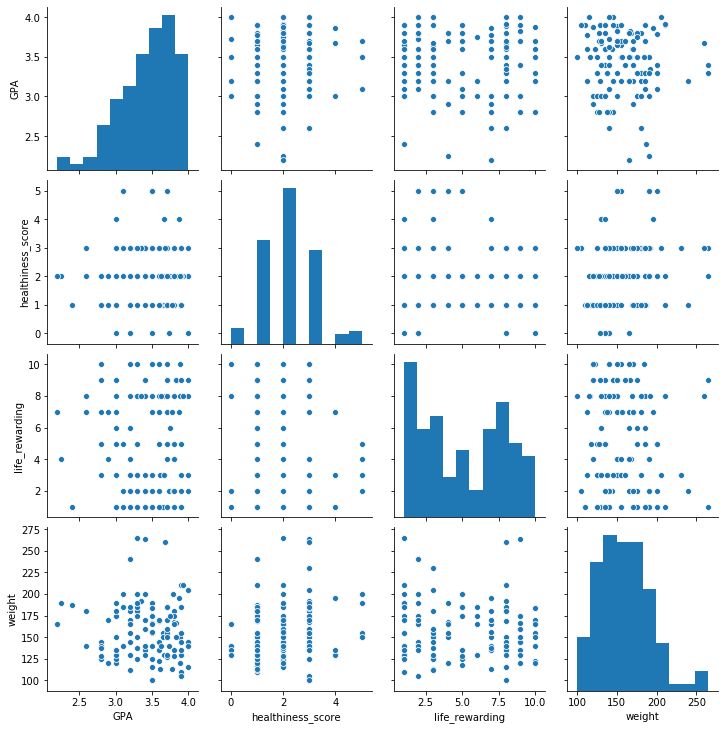

In [37]:
sns.pairplot(df.filter(['GPA','healthiness_score','life_rewarding', 'weight']))

In [38]:
import plotly.express as px

fig = px.scatter_3d(df, x='comfort_food_fc_meat', y='food_childhood_fc_meat', z='GPA', title= 'TEST')
fig.show()

In [39]:
# meat fruit veggie carbs junk healthy_tw water

fig = px.scatter_3d(df, x='comfort_food_fc_junk', y='healthiness_score', z='GPA', title= 'TEST')
fig.show()

In [40]:
#food_childhood - split by comma delineator

#changing pandas display options
#pd.set_option("max_columns", None) 
#pd.set_option("max_rows", None)

#coverting to lowercase
#print(df['food_childhood'])
df['food_childhood'] = df['food_childhood'].str.lower()
print(df['food_childhood'])


#splitting based on comma
food_lst = df['food_childhood'].str.split(",")
#food_lst.head(20)


#getting list of words by tokenizing the split words from food_lst
import nltk
stopwords = ['and', '/', 'tender', 'fried', '&', 'grilled', 'scalloped', 'wings', 'on', 'the', 'cob', 'fingers', 'nuggets', 'parm', 'buttered', 
'garlic', 'legs', 'rolls', 'parmesan', 'orange', 'mashed', 'cheesy', 'tenders', 'parmigiana', 'fry', '.', 'adobo', 'food', 'with', 'dad', 'breaded', "'s", 
'cheesey', 'cherry', 'alfredo', 'butter', 'n', 'or', 'homemade', 'for', 'dinner']
clean_food = []
#calling into each row's list of foods
for lst in food_lst:
    try:
        #going thru the "words" separated by each comma
        for word in lst:
            #tokenizing each word
            temp = nltk.word_tokenize(word)
            #going thru each tokenized phrase
            for i in temp:
                if i not in stopwords:
                    #getting a clean list of foods
                    clean_food.append(i)
    except:
        TypeError #NaN is giving error so have to do this except
print(clean_food)


#seeing most common words
from collections import Counter
f_count = Counter(clean_food)
f_count.most_common(n=20)

#making categories based most common and creating columns that are all zeros to start
categories = ['chicken', 'pizza', 'macncheese', 'pasta', 'steak', 'potatoes', 'tacos', 'other']
for cat in categories:
    df['fc_' + cat] = 0 #stands for food_childhood_fooditem
#print(df)

#converting values from "food_childhood" column into new category column depending on value
#same idea as above but now tokenize each row and call into those words to determine which column (above was just one big list together)
for index, row in df.iterrows():
    try:
        comma_words = row['food_childhood'].split(",") #still have words with commas attached to them
        #print("words is:", words)
        for each in comma_words:
            word = nltk.word_tokenize(each)
            clean = [w for w in word if w not in stopwords]
            print('clean is:', clean)

            for i in clean:
                if i in ['chicken', 'wing']:
                    #print('hi')
                    df.at[index, 'fc_chicken'] += 1
                if i in ['pizza', 'pizza/']:
                    df.at[index, 'fc_pizza'] += 1
                if i in ['mac', 'macaroni']:
                    df.at[index, 'fc_macncheese'] += 1
                if i in ['pasta', 'spaghetti', 'lasagna', 'noodles', 'tortellini', 'noodle']:
                    df.at[index, 'fc_pasta'] += 1
                if i in ['steak']:
                    df.at[index, 'fc_steak'] += 1
                if i in ['potato', 'potatoes']:
                    df.at[index, 'fc_potatoes'] += 1
                if i in ['tacos']:
                    df.at[index, 'fc_tacos'] += 1
                if i in ['rice', 'biscuits', 'beef', 'soup', 'beans', 'fries','plaintain', 'fish', 'hamburgers', 'dogs', 
                'shrimp', 'eggs', 'pancakes', 'ham', 'corn','crab', 'curry', 'stew', 'saltfish', 'manacotti', 'deer',
                'crab', 'waffles', 'chocolate', 'biscuits', 'won', 'stir', 'cream', 'tarts', 'toast', 'pickles', 'chinese', 'hamloaf', 
                'perogies', 'roast', 'meatloaf', 'salmon', 'turkey', 'tomatoes', 'salad', 'quesadillas','meatballs',  'schnitzle',   
                'dip', 'sloppy', 'burgers', 'sandwich', 'pop-tarts', 'breakfast', 'peanut', 'jelly', 'celery', 'pockets', 'quesadilla', 
                'jollof', 'bread','salmon', 'tuna', 'casserole', 'sausage', 'manicotti', 'biryani',  'pita','dumplings',  'popcorn', 
                'vegetable', 'tiramisu', 'stromboli', 'isombe', 'plantains', 'ugali']:
                    df.at[index, 'fc_other'] += 1

    except:
        AttributeError
        
print(df)

0                                     rice  and chicken 
1           chicken and biscuits, beef soup, baked beans
3                          beef stroganoff, tacos, pizza
4                          pasta, chicken tender, pizza 
5                          fries, plaintain & fried fish
6                            grilled chicken, hamburgers
7                chicken, cheesey potatoes, and hot dogs
8                                      shrimp, spaghetti
9                                 pasta, eggs, pancakes 
10                                               chicken
11                           scalloped potatoes and ham 
12            pizza, chicken wings, and corn on the cob 
13                                  steak, lasagna, crab
14                                                 pizza
16                      curry, stew chicken and saltfish
17                chicken fingers, steak, mac and cheese
18                                               chicken
19                             

       GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.400       2          1               430           NaN           315.0   
1    3.654       1          1               610           3.0           420.0   
3    3.200       1          1               430           3.0           420.0   
4    3.500       1          1               720           2.0           420.0   
5    2.250       1          1               610           3.0           980.0   
6    3.800       2          1               610           3.0           420.0   
7    3.300       1          1               720           3.0           420.0   
8    3.300       1          1               430           NaN           420.0   
9    3.300       1          1               430           3.0           315.0   
10   3.500       1          1               610           3.0           980.0   
11   3.904       1          1               720           4.0           420.0   
12   3.400       2          

In [41]:
#food_childhood - split by comma delineator

#changing pandas display options
pd.set_option("max_columns", None) 
pd.set_option("max_rows", None)

#coverting to lowercase
#print(df['food_childhood'])
df['food_childhood'] = df['food_childhood'].str.lower()
print(df['food_childhood'])


#splitting based on comma
food_lst = df['food_childhood'].str.split(",")
#food_lst.head(20)


#getting list of words by tokenizing the split words from food_lst
import nltk
stopwords = ['and', '/', 'tender', 'fried', '&', 'grilled', 'scalloped', 'wings', 'on', 'the', 'cob', 'fingers', 'nuggets', 'parm', 'buttered', 
'garlic', 'legs', 'rolls', 'parmesan', 'orange', 'mashed', 'cheesy', 'tenders', 'parmigiana', 'fry', '.', 'adobo', 'food', 'with', 'dad', 'breaded', "'s", 
'cheesey', 'cherry', 'alfredo', 'butter', 'n', 'or', 'homemade', 'for', 'dinner']
clean_food = []
#calling into each row's list of foods
for lst in food_lst:
    try:
        #going thru the "words" separated by each comma
        for word in lst:
            #tokenizing each word
            temp = nltk.word_tokenize(word)
            #going thru each tokenized phrase
            for i in temp:
                if i not in stopwords:
                    #getting a clean list of foods
                    clean_food.append(i)
    except:
        TypeError #NaN is giving error so have to do this except
print(clean_food)


#seeing most common words
from collections import Counter
f_count = Counter(clean_food)
f_count.most_common(n=20)

#making categories based most common and creating columns that are all zeros to start
categories = ['chicken', 'pizza', 'macncheese', 'pasta', 'steak', 'potatoes', 'tacos', 'other']
for cat in categories:
    df['fc_' + cat] = 0 #stands for food_childhood_fooditem
#print(df)

#converting values from "food_childhood" column into new category column depending on value
#same idea as above but now tokenize each row and call into those words to determine which column (above was just one big list together)
for index, row in df.iterrows():
    try:
        comma_words = row['food_childhood'].split(",") #still have words with commas attached to them
        #print("words is:", words)
        for each in comma_words:
            word = nltk.word_tokenize(each)
            clean = [w for w in word if w not in stopwords]
            print('clean is:', clean)

            for i in clean:
                if i in ['chicken', 'wing']:
                    #print('hi')
                    df.at[index, 'fc_chicken'] += 1
                if i in ['pizza', 'pizza/']:
                    df.at[index, 'fc_pizza'] += 1
                if i in ['mac', 'macaroni']:
                    df.at[index, 'fc_macncheese'] += 1
                if i in ['pasta', 'spaghetti', 'lasagna', 'noodles', 'tortellini', 'noodle']:
                    df.at[index, 'fc_pasta'] += 1
                if i in ['steak']:
                    df.at[index, 'fc_steak'] += 1
                if i in ['potato', 'potatoes']:
                    df.at[index, 'fc_potatoes'] += 1
                if i in ['tacos']:
                    df.at[index, 'fc_tacos'] += 1
                if i in ['rice', 'biscuits', 'beef', 'soup', 'beans', 'fries','plaintain', 'fish', 'hamburgers', 'dogs', 
                'shrimp', 'eggs', 'pancakes', 'ham', 'corn','crab', 'curry', 'stew', 'saltfish', 'manacotti', 'deer',
                'crab', 'waffles', 'chocolate', 'biscuits', 'won', 'stir', 'cream', 'tarts', 'toast', 'pickles', 'chinese', 'hamloaf', 
                'perogies', 'roast', 'meatloaf', 'salmon', 'turkey', 'tomatoes', 'salad', 'quesadillas','meatballs',  'schnitzle',   
                'dip', 'sloppy', 'burgers', 'sandwich', 'pop-tarts', 'breakfast', 'peanut', 'jelly', 'celery', 'pockets', 'quesadilla', 
                'jollof', 'bread','salmon', 'tuna', 'casserole', 'sausage', 'manicotti', 'biryani',  'pita','dumplings',  'popcorn', 
                'vegetable', 'tiramisu', 'stromboli', 'isombe', 'plantains', 'ugali']:
                    df.at[index, 'fc_other'] += 1

    except:
        AttributeError
        
print(df)


0                                     rice  and chicken 
1           chicken and biscuits, beef soup, baked beans
3                          beef stroganoff, tacos, pizza
4                          pasta, chicken tender, pizza 
5                          fries, plaintain & fried fish
6                            grilled chicken, hamburgers
7                chicken, cheesey potatoes, and hot dogs
8                                      shrimp, spaghetti
9                                 pasta, eggs, pancakes 
10                                               chicken
11                           scalloped potatoes and ham 
12            pizza, chicken wings, and corn on the cob 
13                                  steak, lasagna, crab
14                                                 pizza
16                      curry, stew chicken and saltfish
17                chicken fingers, steak, mac and cheese
18                                               chicken
19                             

clean is: ['pizza']
clean is: ['spaghetti', 'tacos']
clean is: ['spaghetti', 'chicken', 'panini', 'sandwich']
clean is: ['spaghetti', 'pop-tarts']
clean is: ['pasta']
clean is: ['breakfast']
clean is: ['pizza']
clean is: ['peanut', 'jelly']
clean is: ['celery', 'peanut']
clean is: ['hot', 'pockets']
clean is: ['pizza']
clean is: ['quesadilla']
clean is: ['chocolate']
clean is: ['steak']
clean is: ['jollof', 'rice']
clean is: ['bread']
clean is: ['pasta']
clean is: ['chinese']
clean is: ['pizza']
clean is: ['chicken']
clean is: ['pasta']
clean is: ['chicken']
clean is: ['pizza']
clean is: ['steak']
clean is: ['chicken']
clean is: ['pizza']
clean is: ['spaghetti']
clean is: ['italian', 'potato', 'soup']
clean is: ['steak']
clean is: ['spaghetti']
clean is: ['salmon']
clean is: ['macaroni', 'cheese']
clean is: ['pizza']
clean is: ['chicken']
clean is: ['spaghetti']
clean is: ['cheese']
clean is: ['chicken']
clean is: ['wedding', 'soup']
clean is: ['pasta']
clean is: ['chicken']
clean is: 

## Visualization (8 points, 2 points each)
- Data visualization activity (box plot, bar plot, violin plot, and pairplot to see
relationships and distribution, etc.).
- Describe anything you find in the data after each visualization.
- What data visualization helped you understand about data distribution.
- What you did about possible outlier as per data distribution visualization. (Did you
confirm with your client whether it is actually an outlier or put a disclosure statement in your
notebook if you decided to remove it?)


HW 1 answer:
The survey contains two questions where the respondants were asked to list 3-5 comfort foods and provides reasons why they eat the comfort food. We see potential for the list of foods to be translated into several new attributes so that each food type can be analyzed separately. An additional feature was created from the reason question that capture the first reason mentioned. Second, third, or higher reasons can be added as new attributes.

       GPA  Gender  eating_out  healthiness_score  life_rewarding  weight  \
0    2.400       2           3                  1             1.0   187.0   
1    3.654       1           2                  2             1.0   155.0   
3    3.200       1           2                  1             2.0   240.0   
4    3.500       1           2                  2             1.0   190.0   
5    2.250       1           1                  2             4.0   190.0   
6    3.800       2           2                  1             8.0   180.0   
7    3.300       1           2                  3             3.0   137.0   
8    3.300       1           5                  3             8.0   180.0   
9    3.300       1           3                  1             3.0   125.0   
10   3.500       1           2                  2             8.0   116.0   
11   3.904       1           1                  1             1.0   110.0   
12   3.400       2           1                  3             9.0   264.0   

father_education_5.0   -0.286971
mother_education_1.0   -0.177751
father_education_1.0   -0.094097
marital_status_1.0     -0.080116
eating_out             -0.069257
Gender                 -0.047330
mother_education_5.0   -0.041743
weight                 -0.041165
mother_education_3.0   -0.004917
mother_education_4.0    0.000761
life_rewarding          0.002466
healthiness_score       0.042224
father_education_2.0    0.051622
marital_status_2.0      0.068169
father_education_3.0    0.100846
mother_education_2.0    0.154434
father_education_4.0    0.176583
Name: GPA, dtype: float64


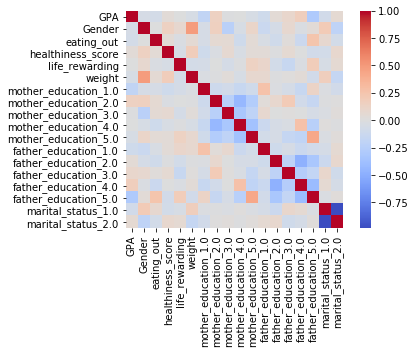

In [42]:
data=df[['GPA','Gender','eating_out','healthiness_score','life_rewarding','weight','mother_education','father_education', 'marital_status']]
data=pd.get_dummies(data, columns=['mother_education','father_education', 'marital_status'])
print(data)
corr = data.corr(method='pearson')
# plot the correlation matrix using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=False, square=True)

# print the correlation coefficients for each variable
GPA_corr = corr['GPA'].sort_values(kind="quicksort")
GPA_corr=GPA_corr.drop('GPA')
print(GPA_corr)

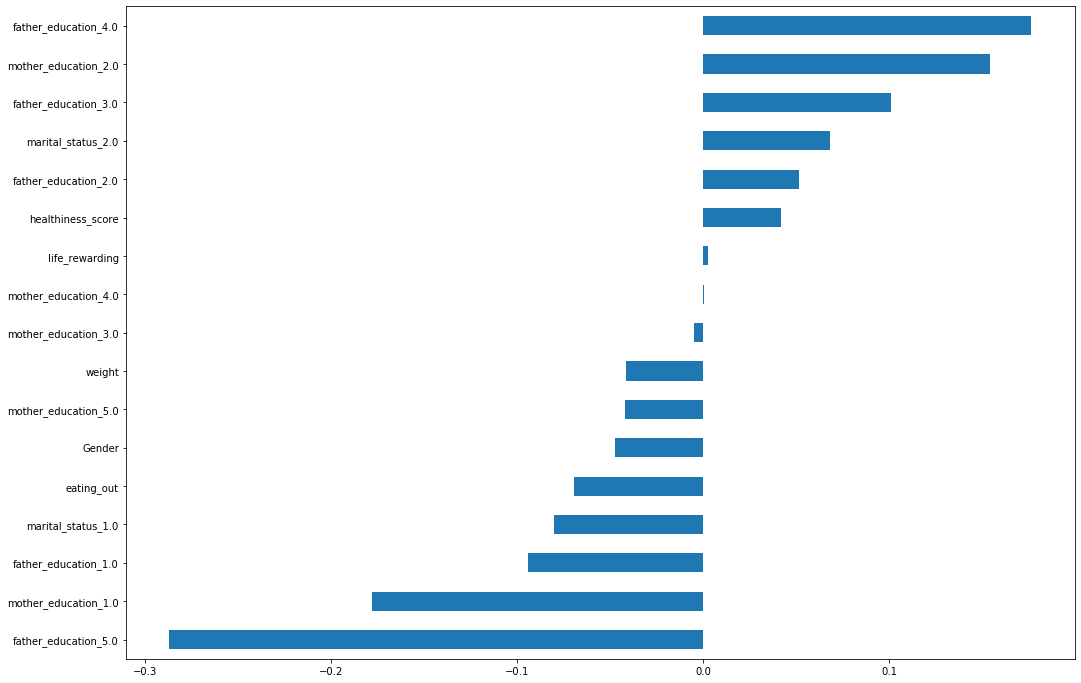

In [43]:
#import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize =(17,12))

#norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
#colors = [plt.cm.RdYlGn(norm(x)) for x in s.values]

GPA_corr.plot.barh()

#c.plot.barh()

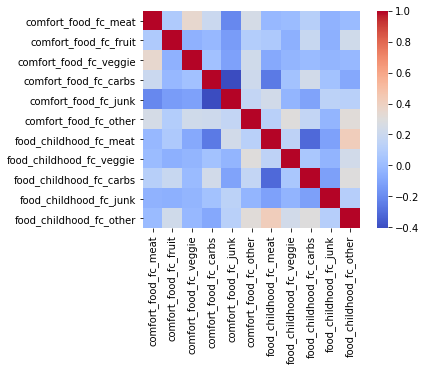

In [46]:
datafood=df[['comfort_food_fc_meat',
'comfort_food_fc_fruit',
'comfort_food_fc_veggie',
'comfort_food_fc_carbs',
'comfort_food_fc_junk',
'comfort_food_fc_other',
'comfort_food_fc_otherValues',
'food_childhood_fc_meat',
'food_childhood_fc_veggie',
'food_childhood_fc_carbs',
'food_childhood_fc_junk',
'food_childhood_fc_other',
'food_childhood_fc_otherValues']]
datafood_corr = datafood.corr(method='pearson')
sns.heatmap(datafood_corr, cmap='coolwarm', annot=False, square=True)
